In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = '/content/Data_Train.xlsx'
train_data = pd.read_excel(train_path)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.info(), train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


(None, (10683, 11))

In [4]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


EDA and Data Cleaning

In [5]:
train_data = train_data.dropna()

In [6]:
## Convert Date_of_journey to datetime
train_data['Date_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y')

<ipython-input-6-651222fce4f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Date_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y')


In [7]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month
train_data = train_data.drop(['Date_of_Journey'], axis=1)

In [8]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [9]:
## Depature Time
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time'], format='%H:%M').dt.hour

train_data['Dep_minute'] = pd.to_datetime(train_data['Dep_Time'], format='%H:%M').dt.minute

train_data = train_data.drop(['Dep_Time'], axis=1)

In [10]:
## Arrival Time

train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

train_data = train_data.drop(['Arrival_Time'], axis=1)

<ipython-input-10-00067d17e175>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
<ipython-input-10-00067d17e175>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute


In [11]:
duration = list(train_data['Duration'])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if 'h' in duration[i]:
      duration[i] = duration[i].strip() + ' 0m'
    else:
      duration[i] = '0h ' + duration[i]

duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
  duration_hour.append(int(duration[i].split(sep='h')[0]))
  duration_minute.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [12]:
# Adding duration_hour and duration_minute to train_data
train_data['Duration_hours'] = duration_hour
train_data['Duration_minute'] = duration_minute

In [13]:
train_data = train_data.drop(['Duration'], axis = 1)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


Handling Categorical Data

In [15]:
train_data.groupby(['Airline'])['Price'].mean().sort_values(ascending=False)

,Price
Airline,
Jet Airways Business,58358.666667
Jet Airways,11643.923357
Multiple carriers Premium economy,11418.846154
Multiple carriers,10902.678094
Air India,9612.427756
Vistara Premium economy,8962.333333
Vistara,7796.348643
GoAir,5861.056701
IndiGo,5673.682903


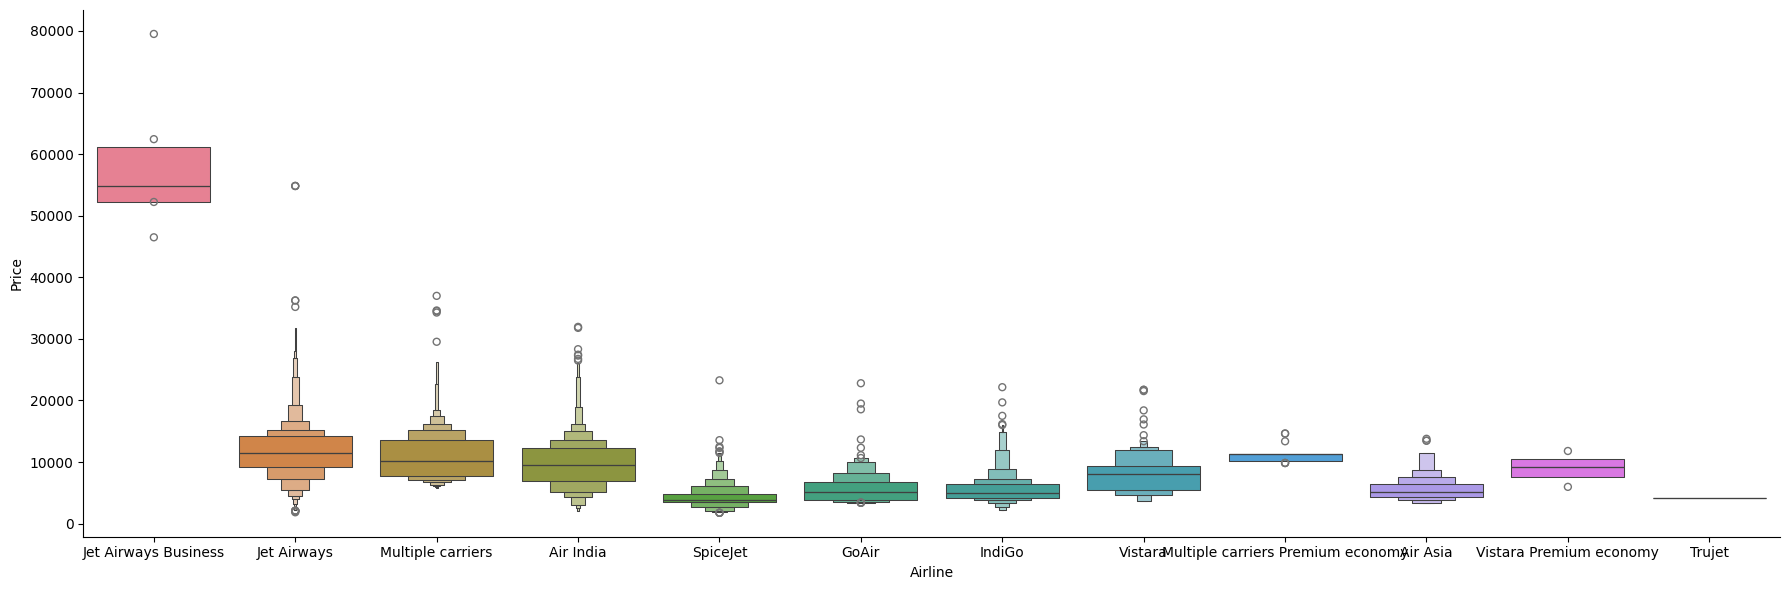

In [16]:
# From the graph we can see that Jet Airways Business has the highest price

sns.catplot(x = 'Airline', y = 'Price', data = train_data.sort_values(by='Price', ascending=False),
            kind='boxen', height=6, aspect=3, hue ='Airline')

In [17]:
## Since Airline is a nominal categorical data we perform OneHotEncoding

Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True, dtype=int)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [18]:
train_data['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


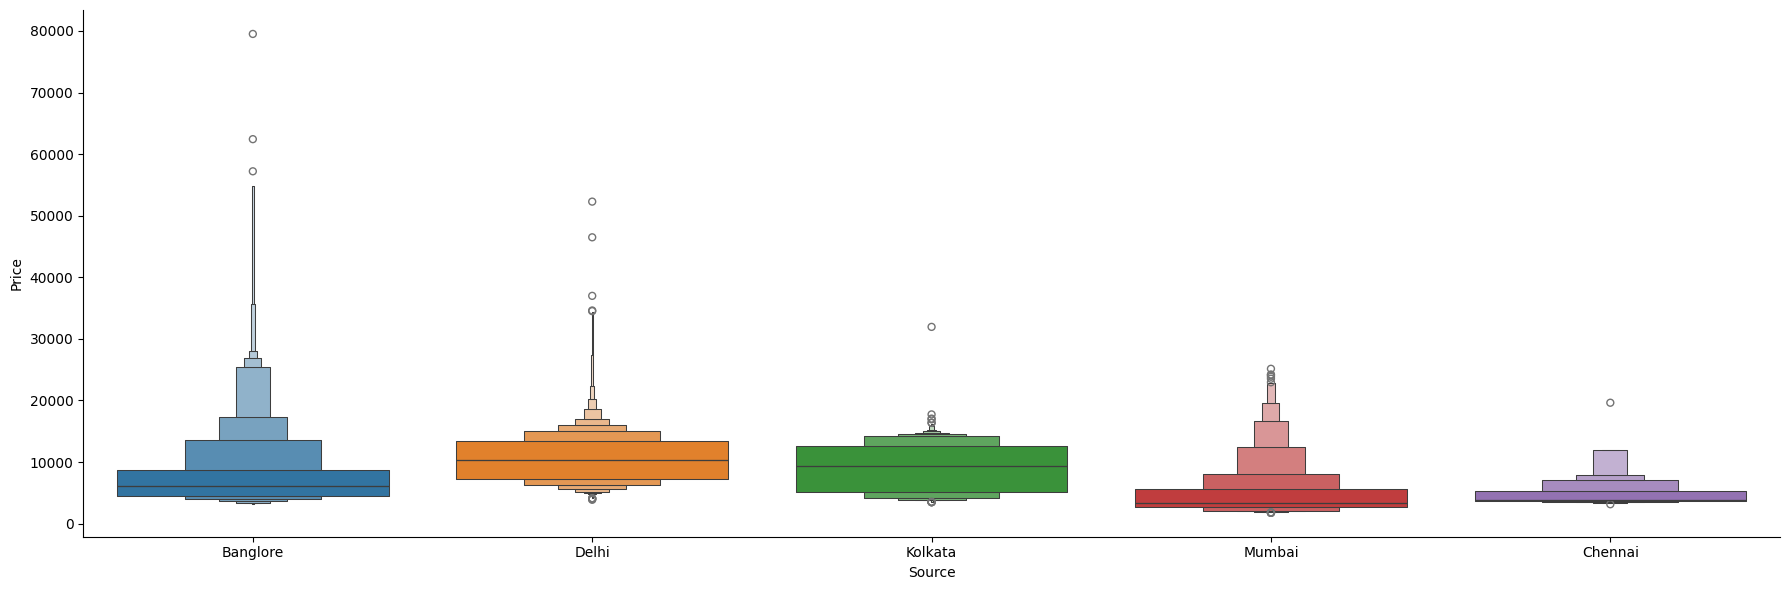

In [19]:
sns.catplot(y = 'Price', x = 'Source', data = train_data.sort_values("Price", ascending=False),
            kind='boxen', height=6,aspect=3, hue = 'Source')

In [20]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True, dtype=int)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [21]:
train_data['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


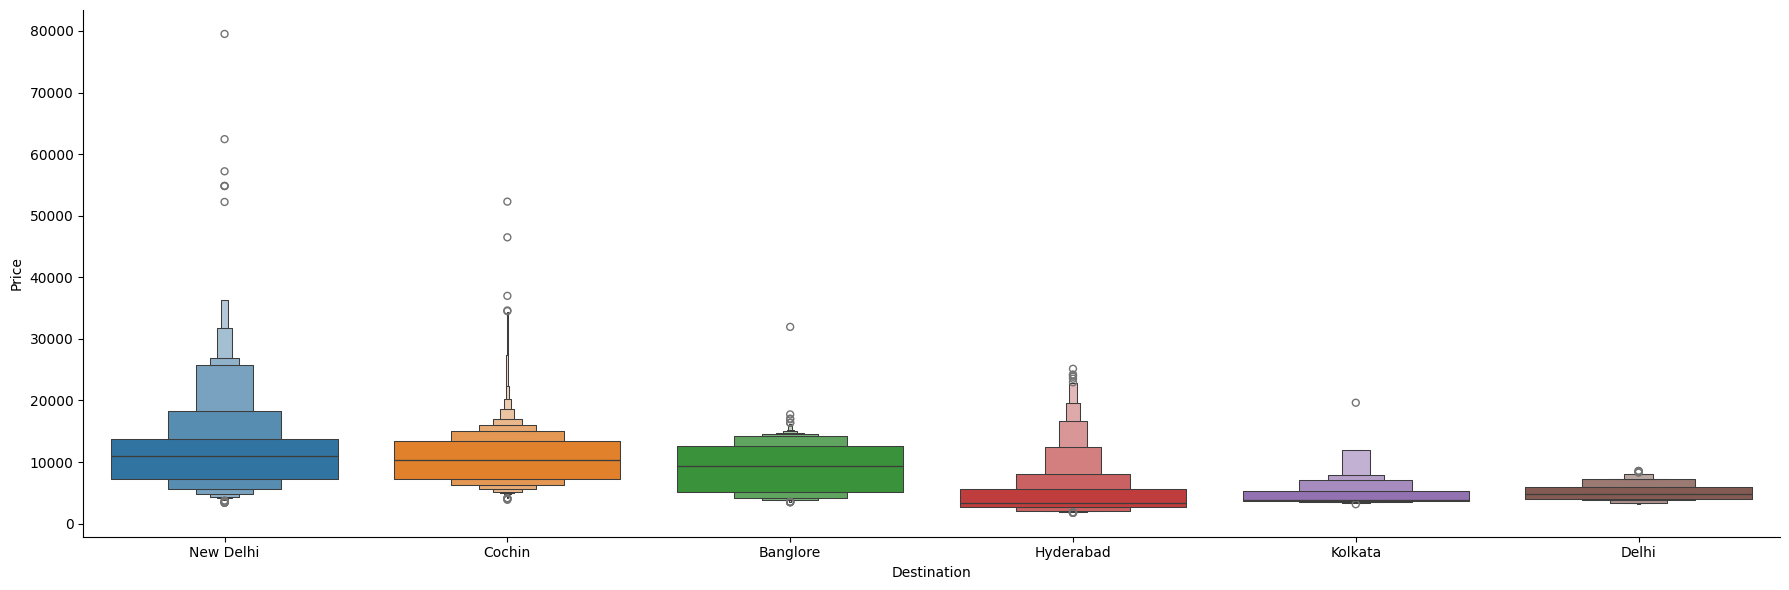

In [22]:
sns.catplot(x = 'Destination', y = 'Price', data = train_data.sort_values(by='Price', ascending=False),
            kind='boxen', height=6, aspect=3, hue ='Destination')

In [23]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True, dtype=int)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [24]:
train_data.head(4)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25


In [25]:
train_data['Route'].value_counts()

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
BOM → VNS → DEL → HYD,1
BLR → HBX → BOM → NAG → DEL,1
BLR → BOM → IXC → DEL,1


In [26]:
train_data['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [27]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data = train_data.drop(['Route','Additional_Info'], axis=1)

In [28]:
train_data['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


In [29]:
train_data['Total_Stops'].unique().tolist()

['non-stop', '2 stops', '1 stop', '3 stops', '4 stops']

In [30]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
dict_ = {'non-stop' : 0, '1 stop' : 1,'2 stops' : 2, '3 stops' : 3, '4 stops' : 4}
train_data['Total_Stops'] = train_data['Total_Stops'].map(dict_)

In [31]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [32]:
train_data['Total_Stops'].unique().tolist()

[0, 2, 1, 3, 4]

In [33]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [34]:
data_train = data_train.drop(['Airline', 'Source', 'Destination'],axis=1)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [35]:
data_train.shape

(10682, 30)

In [36]:
test_path = '/content/Test_set.xlsx'
test_data = pd.read_excel(test_path)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Preprocessing the test data

In [37]:
print("Test data info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null Values")
print("-"*75)
test_data = test_data.dropna()
print(test_data.isnull().sum())

# EDA

#Date of Journey
test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'], format = '%d/%m/%Y').dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'], format = '%d/%m/%Y').dt.month
test_data = test_data.drop(['Date_of_Journey'],axis=1)

#Dep_Time
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time'], format='%H:%M').dt.hour
test_data['Dep_minute'] = pd.to_datetime(test_data['Dep_Time'], format='%H:%M').dt.minute
test_data = test_data.drop(['Dep_Time'], axis=1)

#Arrival_Time
test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_minute'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data = test_data.drop(['Arrival_Time'], axis=1)

duration = list(test_data['Duration'])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if 'h' in duration[i]:
      duration[i] = duration[i].strip() + ' 0m'
    else:
      duration[i] = '0h ' + duration[i]

duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
  duration_hour.append(int(duration[i].split(sep='h')[0]))
  duration_minute.append(int(duration[i].split(sep='m')[0].split()[-1]))

#Adding the duration column to test data
test_data['Duration_hours'] = duration_hour
test_data['Duration_minute'] = duration_minute
test_data = test_data.drop(['Duration'], axis=1)

#Handling Categorical Data
print("Airline")
print("-"*75)
print(test_data['Airline'].value_counts())
Airline = pd.get_dummies(test_data['Airline'], drop_first=True, dtype=int)

print()

print("Source")
print("-"*75)
print(test_data['Source'].value_counts())
Source = pd.get_dummies(test_data['Source'], drop_first=True, dtype=int)

print()

print("Destination")
print("-"*75)
print(test_data['Destination'].value_counts())
Destination = pd.get_dummies(test_data['Destination'], drop_first=True, dtype=int)


dict_ = {'non-stop' : 0, '1 stop' : 1,'2 stops' : 2, '3 stops' : 3, '4 stops' : 4}
test_data['Total_Stops'] = test_data['Total_Stops'].map(dict_)

test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Concat to the dataframe
data_test = pd.concat([test_data, Airline, Source, Destination], axis=1)

data_test = data_test.drop(['Airline', 'Source', 'Destination'], axis=1)

print()
print("-"*75)
print()
print("Shape of test data : ", data_test.shape)


Test data info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null Values
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           

<ipython-input-37-1cc75d05ce87>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
<ipython-input-37-1cc75d05ce87>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Arrival_minute'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute


In [38]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [39]:
X = data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [40]:
X.shape

(10682, 29)

In [41]:
y = data_train.iloc[:,1]
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


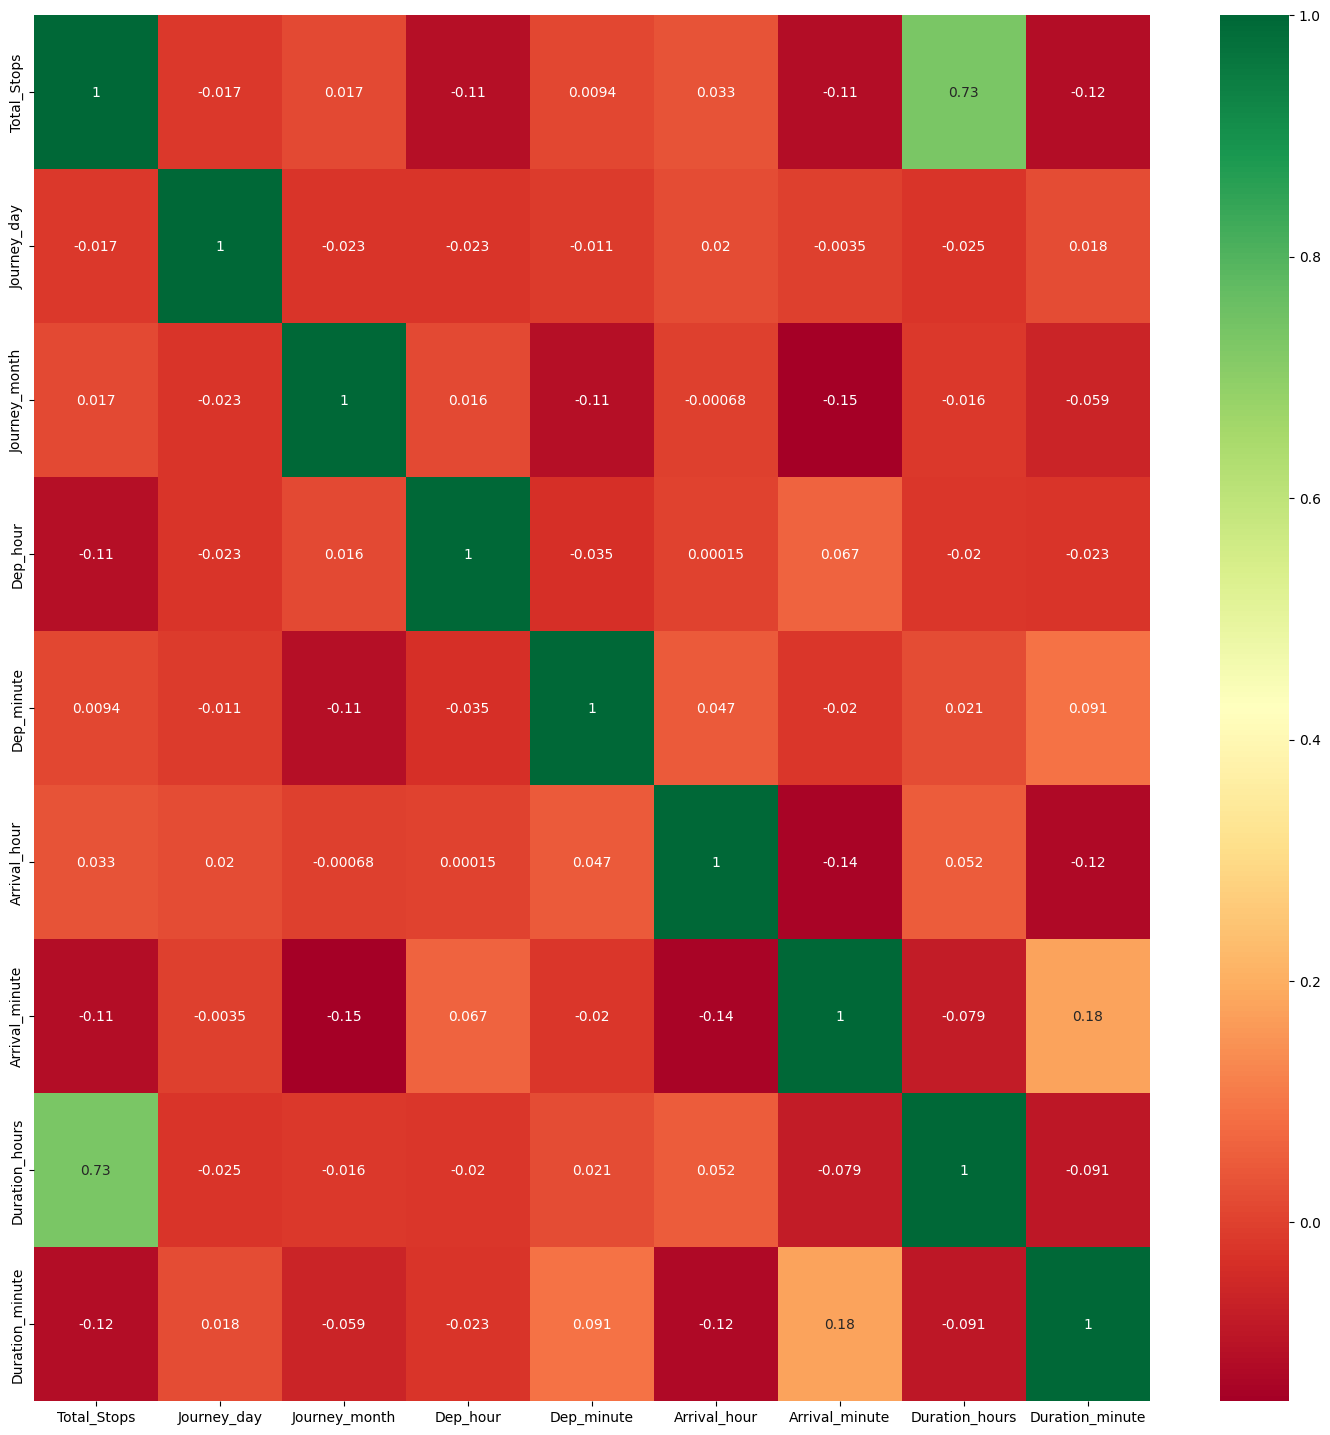

In [42]:
plt.figure(figsize = (18,18))
cor = test_data.corr(numeric_only=True)
sns.heatmap(cor, annot=True,cmap='RdYlGn')

plt.show()

In [43]:
## Important features using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [44]:
print(selection.feature_importances_)
print("_"*75)
print(selection.feature_names_in_)

[1.98710737e-01 1.44196951e-01 5.33814156e-02 2.40800644e-02
 2.14607479e-02 2.77341741e-02 1.90856364e-02 1.45641221e-01
 1.73816880e-02 1.12932408e-02 2.00618550e-03 1.66584414e-02
 1.38363778e-01 6.78330741e-02 1.91833152e-02 8.66178727e-04
 2.58295526e-03 7.36642662e-05 5.22565151e-03 8.33655169e-05
 4.80213453e-04 1.33106715e-02 3.33335695e-03 6.23360604e-03
 9.53955808e-03 1.87457694e-02 7.25045321e-03 5.20618748e-04
 2.47432662e-02]
___________________________________________________________________________
['Total_Stops' 'Journey_day' 'Journey_month' 'Dep_hour' 'Dep_minute'
 'Arrival_hour' 'Arrival_minute' 'Duration_hours' 'Duration_minute'
 'Airline_Air India' 'Airline_GoAir' 'Airline_IndiGo'
 'Airline_Jet Airways' 'Airline_Jet Airways Business'
 'Airline_Multiple carriers' 'Airline_Multiple carriers Premium economy'
 'Airline_SpiceJet' 'Airline_Trujet' 'Airline_Vistara'
 'Airline_Vistara Premium economy' 'Source_Chennai' 'Source_Delhi'
 'Source_Kolkata' 'Source_Mumbai' 'Desti

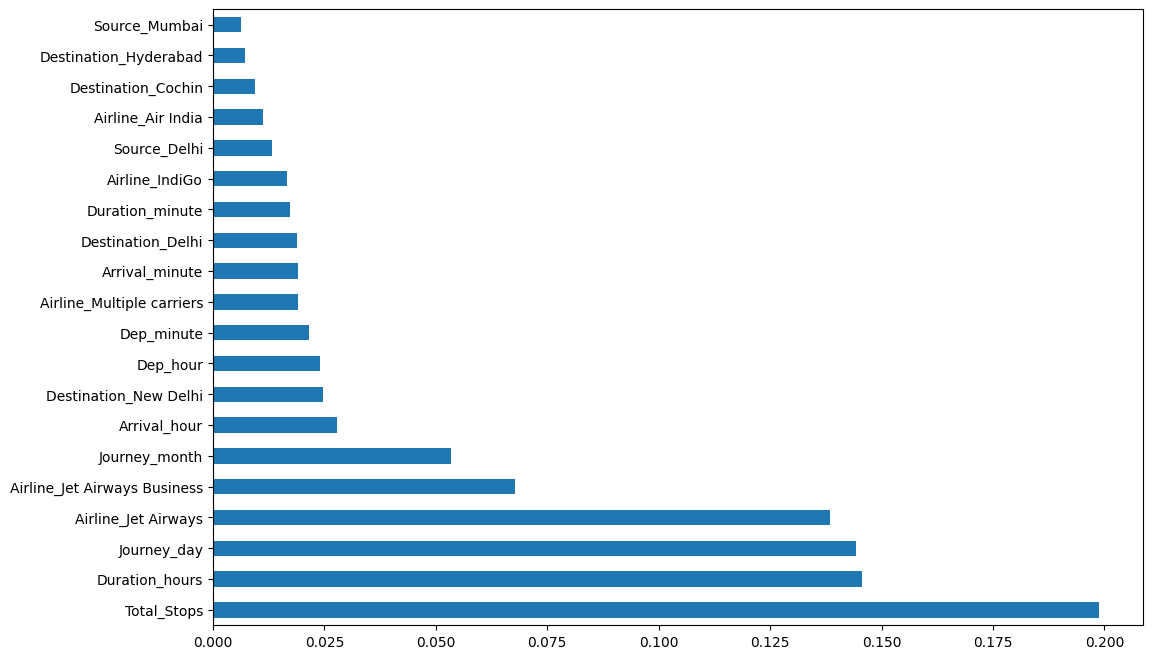

In [45]:
#plot graph of feature importances for better visualization

plt.figure(figsize=(12,8))
feature_importance = pd.Series(selection.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

In [74]:
## Fitting the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [75]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
y_pred = reg_rf.predict(X_test)

In [77]:
reg_rf.score(X_train, y_train)

0.953462031628201

In [78]:
reg_rf.score(X_test, y_test)

0.7972062412210027

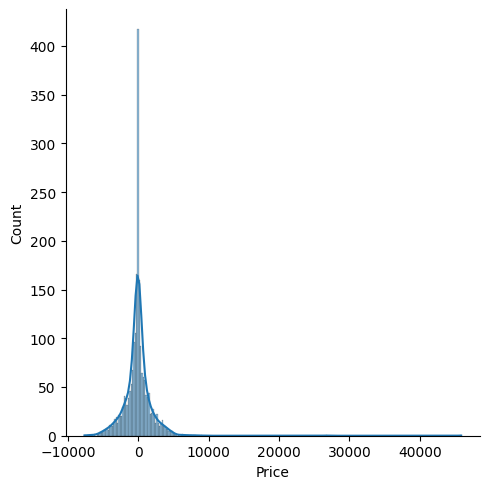

In [51]:
sns.displot(y_test-y_pred, kde=True)
plt.show()

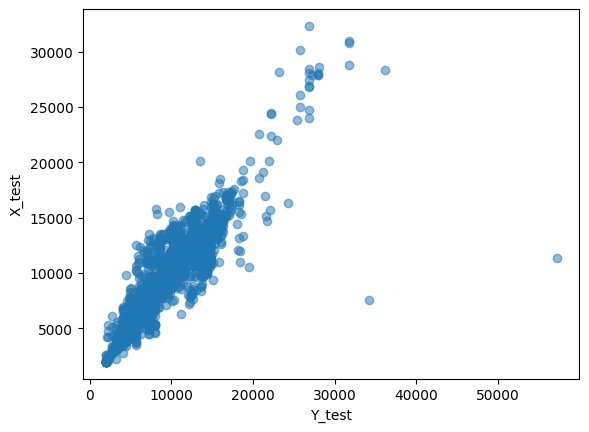

In [52]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("X_test")
plt.show()

In [53]:
from sklearn import metrics

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1176.2898197576742
MSE: 4359744.934692631
RMSE: 2088.0002238248517


In [55]:
# RMSE/(max(DV)-min(DV))

2090.0821/(max(y) - min(y))

0.02688104767661698

In [56]:
metrics.r2_score(y_test, y_pred)

0.7978047701411839

Hyperparameter Tuning

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples required at each lead node
min_samples_leaf = [1,2,5,10]

In [59]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [60]:
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [61]:
rf_random.fit(X_train, y_train)

In [62]:
rf_random.best_params_

In [63]:
prediction = rf_random.predict(X_test)

In [64]:
plt.figure(figsize=(8,8))
sns.displot(y_test-prediction)
plt.show()

In [65]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [67]:
metrics.r2_score(y_test, prediction)

In [70]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators =1000,
 min_samples_split =  2,
 min_samples_leaf =  1,
 max_features =  'sqrt',
 max_depth =  25)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [71]:
y_pred = reg_rf.predict(X_test)

In [72]:
reg_rf.score(X_test, y_test)

0.8200723255346116

Saving the model to reuse

In [80]:
import pickle

# open a file , where you want to store the data
file = open('flight_rf.pkl','wb')

# dump information to that file
pickle.dump(reg_rf,file)

In [ ]:
# model = open('flight_price_rf.pkl','rb')
# forest = pickle.load(model)

In [ ]:
# y_prediction = forest.predict(X_test)

In [ ]:
# metrics.r2_score(y_test, y_prediction)